# Dataset
The dataset contains 5000 training examples of handwritten digits where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image. The second part of the training set is a 5000-dimensional vector y that contains labels for the training set. Here, a “0” digit is labeled as “10”, while the digits “1” to “9” are labeled as “1” to “9” in their natural order.

In [65]:
from scipy.io import loadmat
import numpy as np

data = loadmat('./ex3/ex3data1.mat')
X = data['X']
y = data['y']

# Visualizing the data
Out of the 5000 training examples (images), we display 100 randomly selected images here.

In [66]:
import matplotlib.pyplot as plt

def displayData(X,y):
    fig,ax = plt.subplots(10,10,figsize=(8, 8))
    for i in range(10):
        for j in range (10):
            ax[i,j].axis('off')
            ax[i,j].imshow(X[np.random.randint(5000)].reshape((20,20),order='F'))

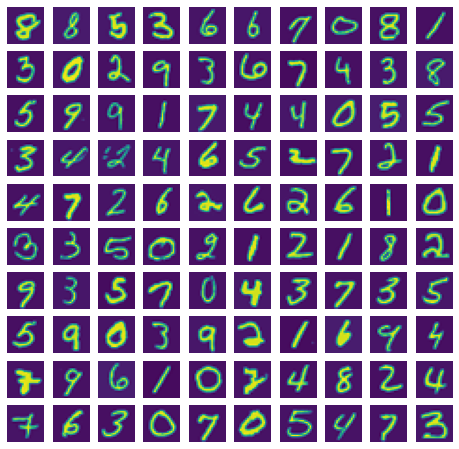

In [67]:
displayData(X,y)

# Initializing Variables

In [68]:
k = 10    #Classes
n = len(y)
X = np.hstack((np.ones((n,1)), X))
a,b = X.shape

# Classification using Logistic Regression
We will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers.

### Cost Function and gradient

In [69]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def computeCost(theta,X,y,lambda_):
    n = len(y)
    hx = sigmoid(np.matmul(X,theta))
    J = -1/n * np.sum(np.multiply(y,np.log(hx)) + np.multiply((1-y),np.log(1-hx))) + (lambda_/2*n) * np.sum(theta[1:]**2)
    return J

def gradient(theta,X,y,lambda_):
    n = len(y)
    hx = sigmoid(np.matmul(X,theta))
    grad = (1/n) * np.matmul((hx - y).T,X).T + (lambda_ / n) * theta
    grad[0] = grad[0] - (lambda_ / n) * theta[0]
    return grad

def gradientDescent(theta,X,y,lambda_,learningRate,maxIterations):
    for i in range(maxIterations):
        grad = gradient(theta,X,y,lambda_)
        theta = theta - learningRate*grad 
    return theta

### One vs All Classification
Here we implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset.

##### Optimization using Gradient Descent:

In [70]:
lambda_ = 0.1
maxIterations = 2000
learningRate = 0.1
theta_arr = np.zeros((k,b))

for i in range(k):
    if(i==0):
        digit = 10
    else:
        digit = i
    temp_theta = np.zeros((b,1))
    theta_arr[i] = (gradientDescent(temp_theta,X,y==digit,lambda_,learningRate,maxIterations).T)

### One vs All Prediction 

In [71]:
predIndex = np.argmax(np.matmul(X,theta_arr.T), axis = 1)
predY = [10 if (i==0) else i for i in predIndex]
print("Gradient Descent Accuracy =",np.mean(predY == y.flatten()) * 100,'%')

Gradient Descent Accuracy = 91.06 %


# Classification using Neural Networks
Logistic regression cannot form more complex hypotheses as it is only a linear classiﬁer. So, we implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. We will be using parameters from a neural network that are already trained. Our goal is to implement the feedforward propagation algorithm to use the weights for prediction.

### Model representation 
The Neural Netowrk has 3 layers – an input layer, a hidden layer and an output layer. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). We have been provided with a set of network parameters already trained. These will be loaded into Theta1 and Theta2. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [72]:
data = loadmat('./ex3/ex3weights.mat')
theta1 = data['Theta1']
theta2 = data['Theta2']

input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

### Feedforward Propagation and Prediction

In [74]:
def prediction(theta1, theta2, X):
    a,_ = X.shape
    out_ih = sigmoid(np.matmul(X, theta1.T))
    out_ih = np.hstack((np.ones((a,1)), out_ih))
    out_ho = sigmoid(np.matmul(out_ih, theta2.T))
    return np.argmax(out_ho, axis = 1)+1

predY =  prediction(theta1, theta2, X)
print('NN Accuracy =',np.mean(predY == y.flatten()) * 100,'%')

NN Accuracy = 97.52 %
